In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv("../ghost/data/train.csv")

In [3]:
df.drop(['id'], axis = 1, inplace = True, errors = 'ignore')
df_final = df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
df.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


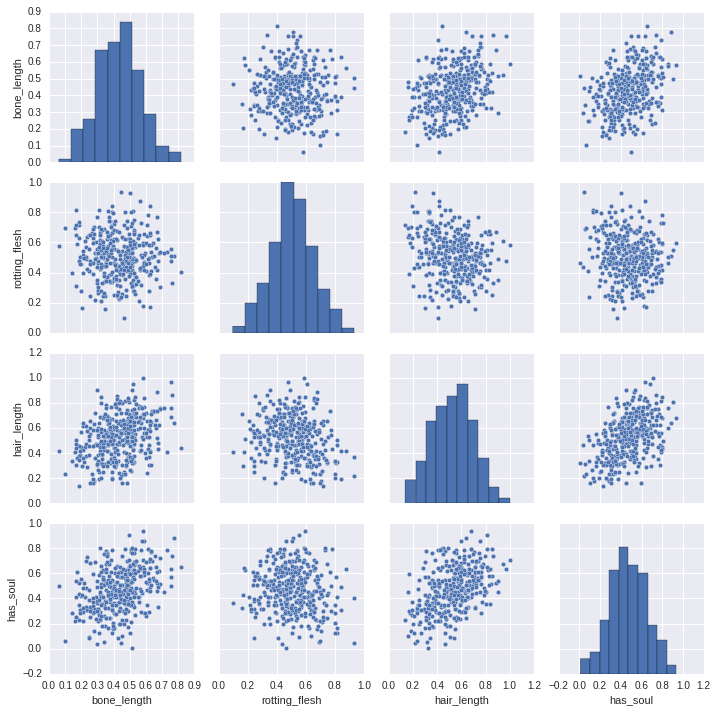

In [5]:
sns.pairplot(df)

In [6]:
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
df["color"] = le_type.fit_transform(df["color"])
df["type"] = le_type.fit_transform(df["type"])

In [7]:
X_train = df.ix[:,:-1]
y_train = df.ix[:,-1]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [14]:
X_train["HairSoul"] = X_train["has_soul"] * X_train["hair_length"]
X_train2 = X_train
X_train2.drop(['has_soul','hair_length'], axis = 1, inplace = True, errors = 'ignore')


In [20]:
import xgboost as xgb

In [43]:
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression(penalty='l2',C=3)
clf4 = xgb.XGBClassifier(n_estimators=3,max_depth=3,learning_rate=0.05)
eclf = VotingClassifier(estimators=[('GNB', clf1), ('rf', clf4), ('lr', clf3)], voting='soft', weights=[1,1,1])

In [50]:
# for i in xrange(1,50):
# clf = GaussianNB()
eclf.fit(X_train2, y_train)

# y_pred = eclf.predict(X_test)
#print accuracy_score(y_pred, y_test)
scores = cross_val_score(eclf, X_train2, y_train, cv=10)
print scores
print scores.mean()

[ 0.76315789  0.73684211  0.76315789  0.76315789  0.78947368  0.78378378
  0.7027027   0.72222222  0.80555556  0.65714286]
0.748719659509


In [51]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('GNB', GaussianNB(priors=None)), ('rf', XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=3, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subs...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         n_jobs=1, voting='soft', weights=[1, 1, 1])

In [68]:
df_test = pd.read_csv("../ghost/data/test.csv")

In [69]:
id = df_test[[0]]
df_test.drop(['id'], axis = 1, inplace = True, errors = 'ignore')
df_test["color"] = le_type.fit_transform(df_test["color"])
df_test["HairSoul"] = df_test["has_soul"] * df_test["hair_length"]
df_test.drop(['has_soul','hair_length'], axis = 1, inplace = True, errors = 'ignore')


In [70]:
def label_type (row):
    if row['type_num'] == 1:
        return "Ghoul"
    if row['type_num'] == 2:
        return "Goblin"
    if row['type_num'] == 0:
        return "Ghost"

In [71]:
pred = eclf.predict(df_test)

sub = pd.DataFrame()
sub["id"] = id
sub["type_num"] = pred


In [73]:
sub["type"] = sub.apply(lambda row: label_type (row),axis=1)

In [74]:
sub.drop(['type_num'], axis = 1, inplace = True, errors = 'ignore')


In [75]:
sub.to_csv("../ghost/submission/submission_2.csv",index=False)

In [76]:
sub

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Ghoul
8,17,Goblin
9,18,Ghoul
